In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Parte 1

La base del siguiente código se obtuvo de https://www.tensorflow.org/tutorials/images/cnn?hl=es-419

## Train, test and split


In [114]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

x_val, x_test, y_val, y_test = train_test_split(train_images, train_labels, test_size=0.5, random_state=42)

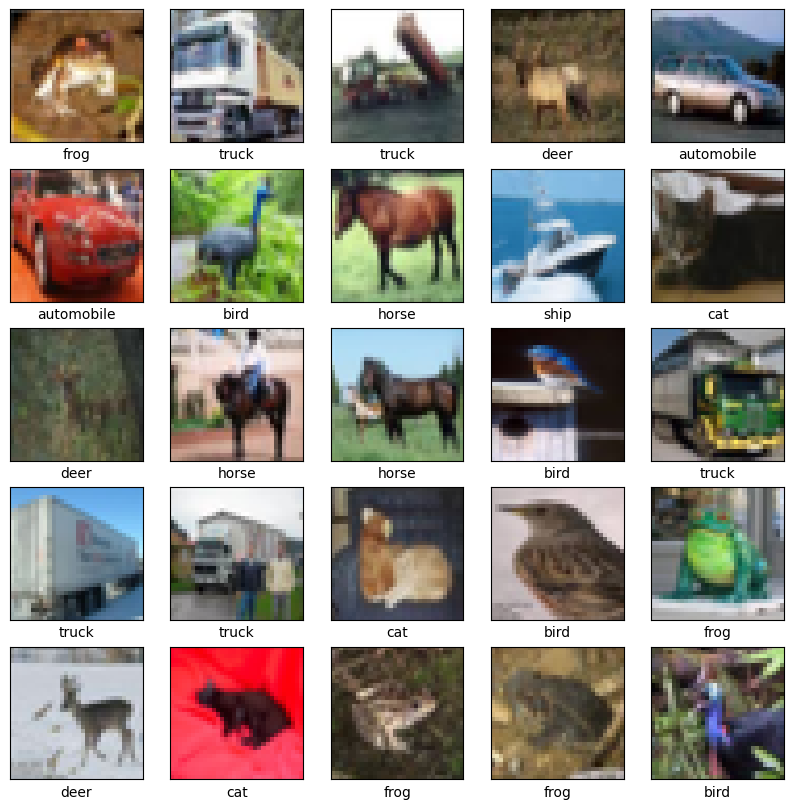

In [115]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Layer explanation


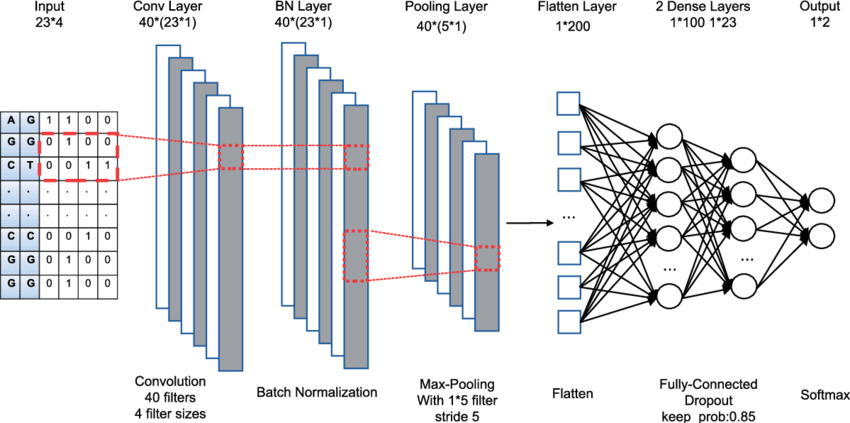

In [116]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#Esto crea una capa convolucional 2D con 32 filtros, cada uno de tamaño (3, 3).
#La función de activación utilizada es ReLU (Rectified Linear Unit), que introduce no linealidad en la red.
#Esto especifica la forma de entrada para la primera capa. En este caso, indica que los datos de entrada deben tener una forma de (32, 32, 3),
#que es típica para imágenes en color con una anchura y altura de 32 píxeles y 3 canales de color (Rojo, Verde, Azul)
model.add(layers.MaxPooling2D((2, 2)))
#Esta línea añade una capa MaxPooling2D después de la primera capa convolucional.
#Max pooling es una operación de reducción de muestreo que reduce las dimensiones espaciales de los datos y ayuda a la red a centrarse en las características más importantes.
#(2, 2) especifica el tamaño de la ventana de agrupamiento.

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



## Layer explanation

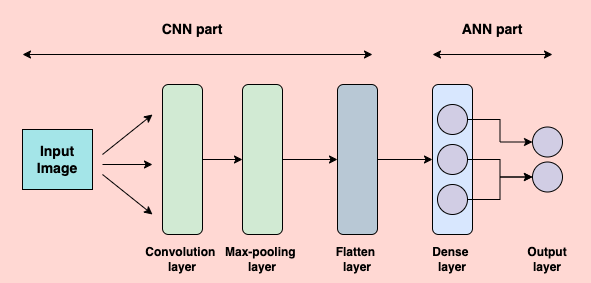

In [117]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [118]:
model.add(layers.Flatten())
#Esta línea añade una capa de Aplanar a su modelo. El propósito de la capa Aplanar es convertir los datos de entrada 2D en un vector 1D.
#Suele usarse cuando se pasa de capas convolucionales (comunes en tareas de procesamiento de imágenes) a capas completamente conectadas.
#La capa Aplanar no tiene ningún parámetro entrenable; simplemente remodela los datos.

model.add(layers.Dense(64, activation='relu'))
#layers.Dense(64): Esto crea una capa Dense (totalmente conectada) con 64 unidades (neuronas).
#El número de unidades representa la dimensionalidad de la salida de la capa.
#activation='relu': La función de activación utilizada en esta capa es ReLU (Rectified Linear Unit).
#ReLU es una función de activación comúnmente utilizada en redes neuronales, conocida por su capacidad para introducir no linealidad.

model.add(layers.Dense(10))
#Esta línea añade otra capa Densa a su modelo.
#Esta capa no especifica una función de activación, lo que significa que usará la activación #lineal por defecto.
#activación lineal (a menudo denominada "sin activación" o activación "identidad").
#Esto es común en la capa de salida de los problemas de clasificación en los que se desea que el modelo produzca puntuaciones brutas (logits) que se puedan utilizar
#con una función de activación adecuada o una función de pérdida (por ejemplo, softmax y entropía cruzada categórica) para la clasificación multiclase.

In [119]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 1024)             

# Compilar y entrenar el modelo

In [120]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# OPTIMIZER
#optimizador='adam': Esto especifica el algoritmo de optimización a utilizar durante el entrenamiento.
#En este caso, se está utilizando el optimizador Adam, que es una opción popular para el entrenamiento de redes neuronales.
#Otros optimizadores podrían ser Stochastic Gradient Descent (SGD) 'sgd', Actualiza los pesos del modelo calculando el gradiente de la función de pérdida con respecto a cada peso y aplicando un pequeño paso en la dirección del gradiente negativo.
#RMSProp 'rmsprop',adapta la tasa de aprendizaje para cada parámetro durante el entrenamiento, lo que puede ayudar a entrenar redes profundas de forma más efectiva.
#Adagrad 'adagrad', adapta las tasas de aprendizaje para cada parámetro individualmente basándose en la información histórica del gradiente. Es particularmente útil para datos dispersos.
#Adadelta 'adadelta', Adadelta es una extensión de Adagrad que pretende abordar algunas de sus limitaciones, como la necesidad de establecer manualmente una tasa de aprendizaje global.

#LOSS
#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True): Esto especifica la función de pérdida que se utilizará durante el entrenamiento.
#SparseCategoricalCrossentropy se utiliza normalmente para tareas de clasificación multiclase en las que las etiquetas objetivo son números enteros (por ejemplo, índices de clase).
#from_logits=True indica que la salida del modelo no se normaliza mediante una activación softmax antes de calcular la pérdida.
#Este es el caso típico cuando se utiliza SparseCategoricalCrossentropy, ya que la última capa del modelo no tiene una activación softmax.

#METRICS
#metrics=['precisión']: Especifica la(s) métrica(s) de evaluación a monitorizar durante el entrenamiento.
#En este caso, se controla la precisión de la clasificación, que indica la frecuencia con la que las predicciones del modelo coinciden con las etiquetas verdaderas.

history = model.fit(train_images, train_labels, epochs=10, validation_data=(x_val, y_val))
#La función #fit() entrena el modelo con los conjuntos de datos de entrenamiento y validación utilizados,
#las épocas especifican el número de veces que el conjunto de datos de entrenamiento pasará por la red para el entrenamiento




Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 1.5390 - accuracy: 0.4376 - val_loss: 1.2718 - val_accuracy: 0.5460
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1801 - accuracy: 0.5809 - val_loss: 1.0529 - val_accuracy: 0.6319
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0254 - accuracy: 0.6395 - val_loss: 0.9730 - val_accuracy: 0.6556
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9228 - accuracy: 0.6761 - val_loss: 0.8239 - val_accuracy: 0.7136
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8412 - accuracy: 0.7043 - val_loss: 0.8073 - val_accuracy: 0.7162
Epoch 6/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7843 - accuracy: 0.7263 - val_loss: 0.7130 - val_accuracy: 0.7504
Epoch 7/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7319 - accuracy: 0.7420 - val_loss: 0.6631 -

# Evaluar el modelo

313/313 - 3s - loss: 0.9049 - accuracy: 0.7042 - 3s/epoch - 11ms/step


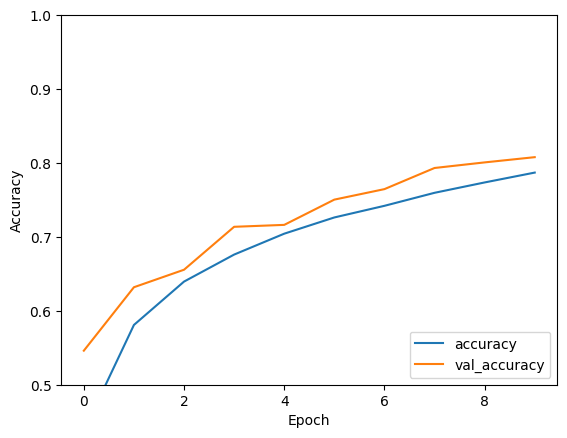

In [121]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [122]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [123]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

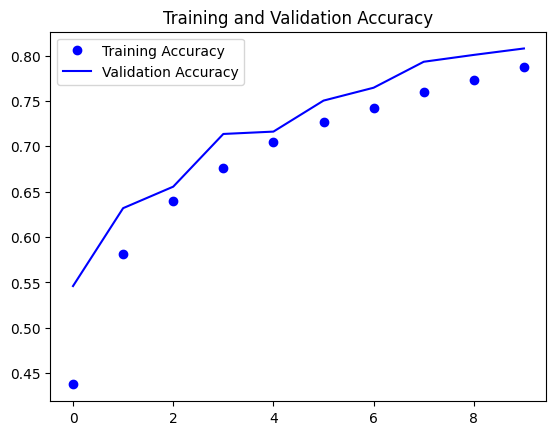

In [124]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

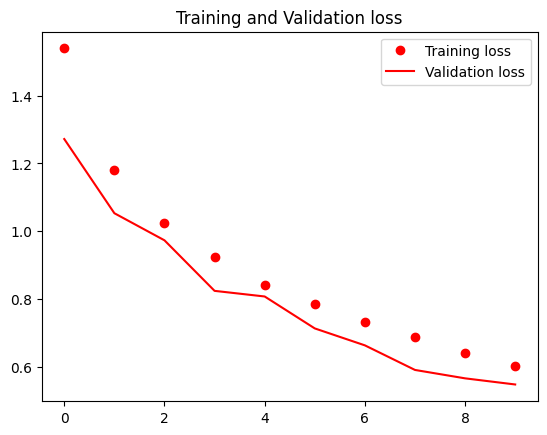

In [125]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [126]:
import numpy as np
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 4s 14ms/step


In [127]:
from sklearn.metrics import confusion_matrix
y_true = test_labels
cm = confusion_matrix(y_true, y_pred)

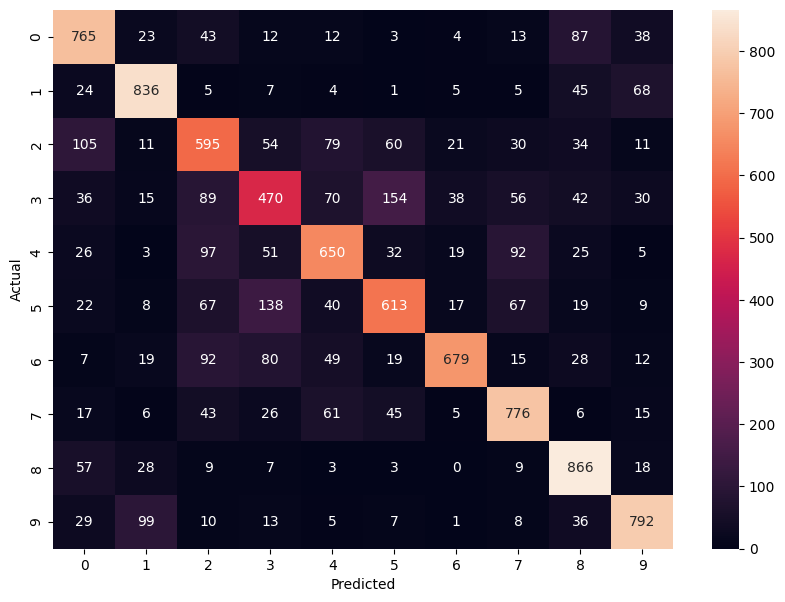

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

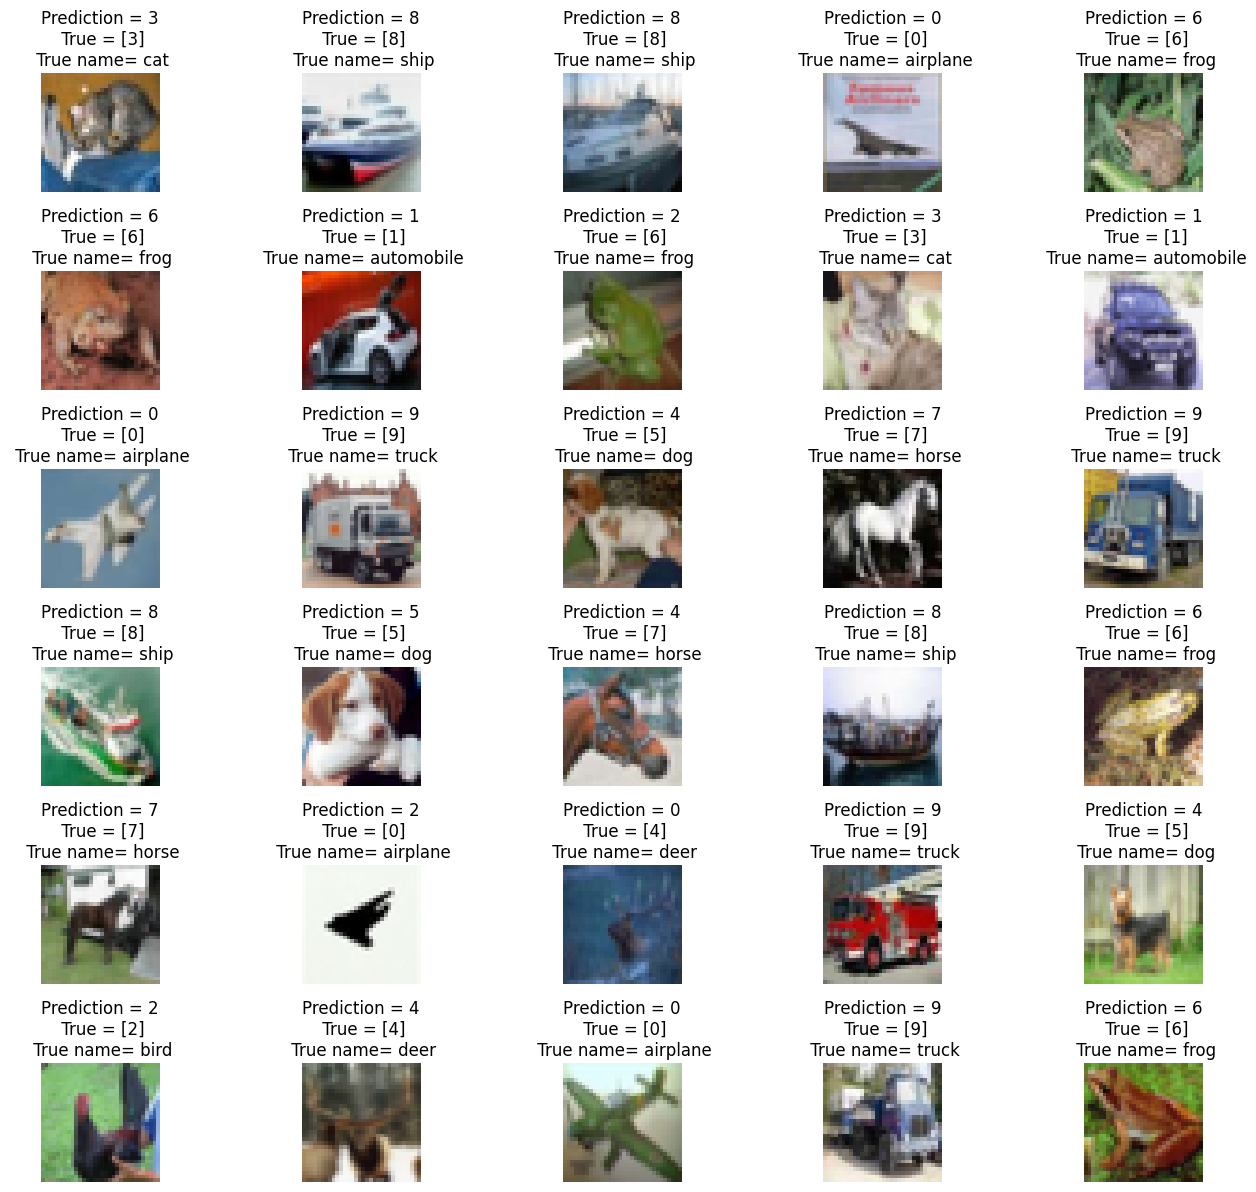

In [129]:
fig, axes = plt.subplots(6, 5, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, 30):
    axes[i].imshow(test_images[i])
    axes[i].set_title('Prediction = {}\n True = {}\n True name= {}'.format(y_pred[i], y_true[i], class_names[y_true[i][0]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2)

## Parte 2
### Add another layer


In [130]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add layer with the tanh activation and a max pooling
model2.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))


### Add more units to the dense layer and change the activation function

In [131]:
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='softmax'))
model2.add(layers.Dense(10))


In [132]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 conv2d_30 (Conv2D)          (None, 2, 2, 32)         

In [135]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#vaidation split
history = model2.fit(train_images, train_labels, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 0.9347 - accuracy: 0.6783 - val_loss: 0.8709 - val_accuracy: 0.7001
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8948 - accuracy: 0.6935 - val_loss: 0.8501 - val_accuracy: 0.7088
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8541 - accuracy: 0.7064 - val_loss: 0.8253 - val_accuracy: 0.7184
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8190 - accuracy: 0.7189 - val_loss: 0.7347 - val_accuracy: 0.7501
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7858 - accuracy: 0.7310 - val_loss: 0.7375 - val_accuracy: 0.7520
Epoch 6/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7547 - accuracy: 0.7417 - val_loss: 0.6879 - val_accuracy: 0.7706
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7333 - accuracy: 0.7493 - val_loss: 0.6895 -

In [ ]:
plt.plot(history.history2['accuracy'], label='accuracy')
plt.plot(history.history2['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

In [138]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [139]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

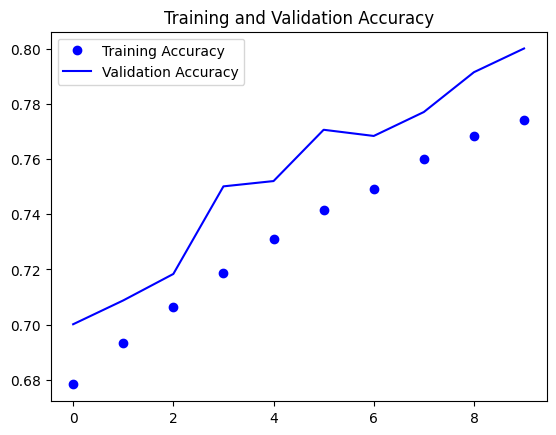

In [140]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

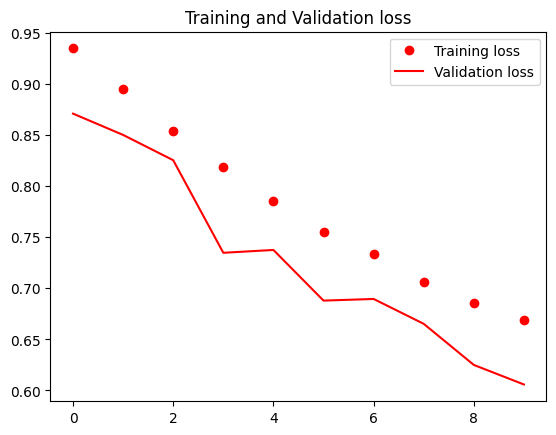

In [141]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [142]:
import numpy as np
y_pred_probs = model2.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 4s 13ms/step


In [143]:
from sklearn.metrics import confusion_matrix
y_true = test_labels
cm = confusion_matrix(y_true, y_pred)

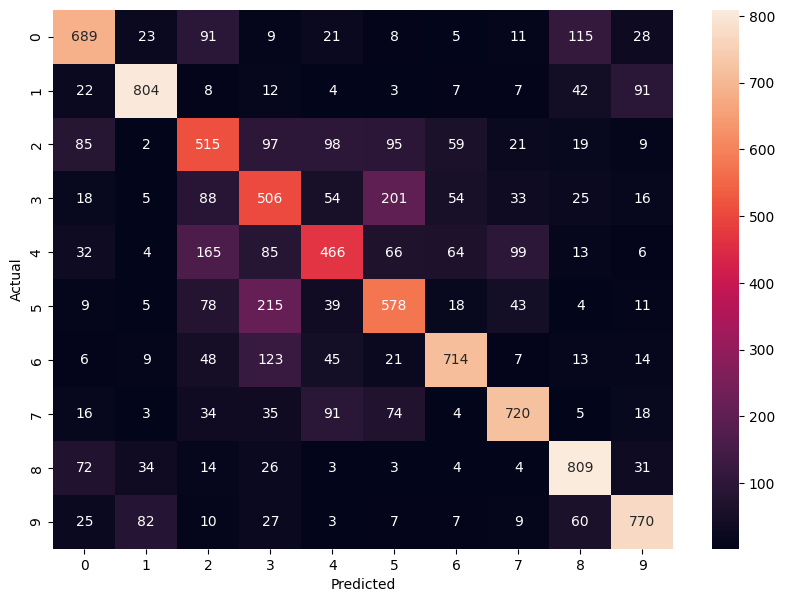

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

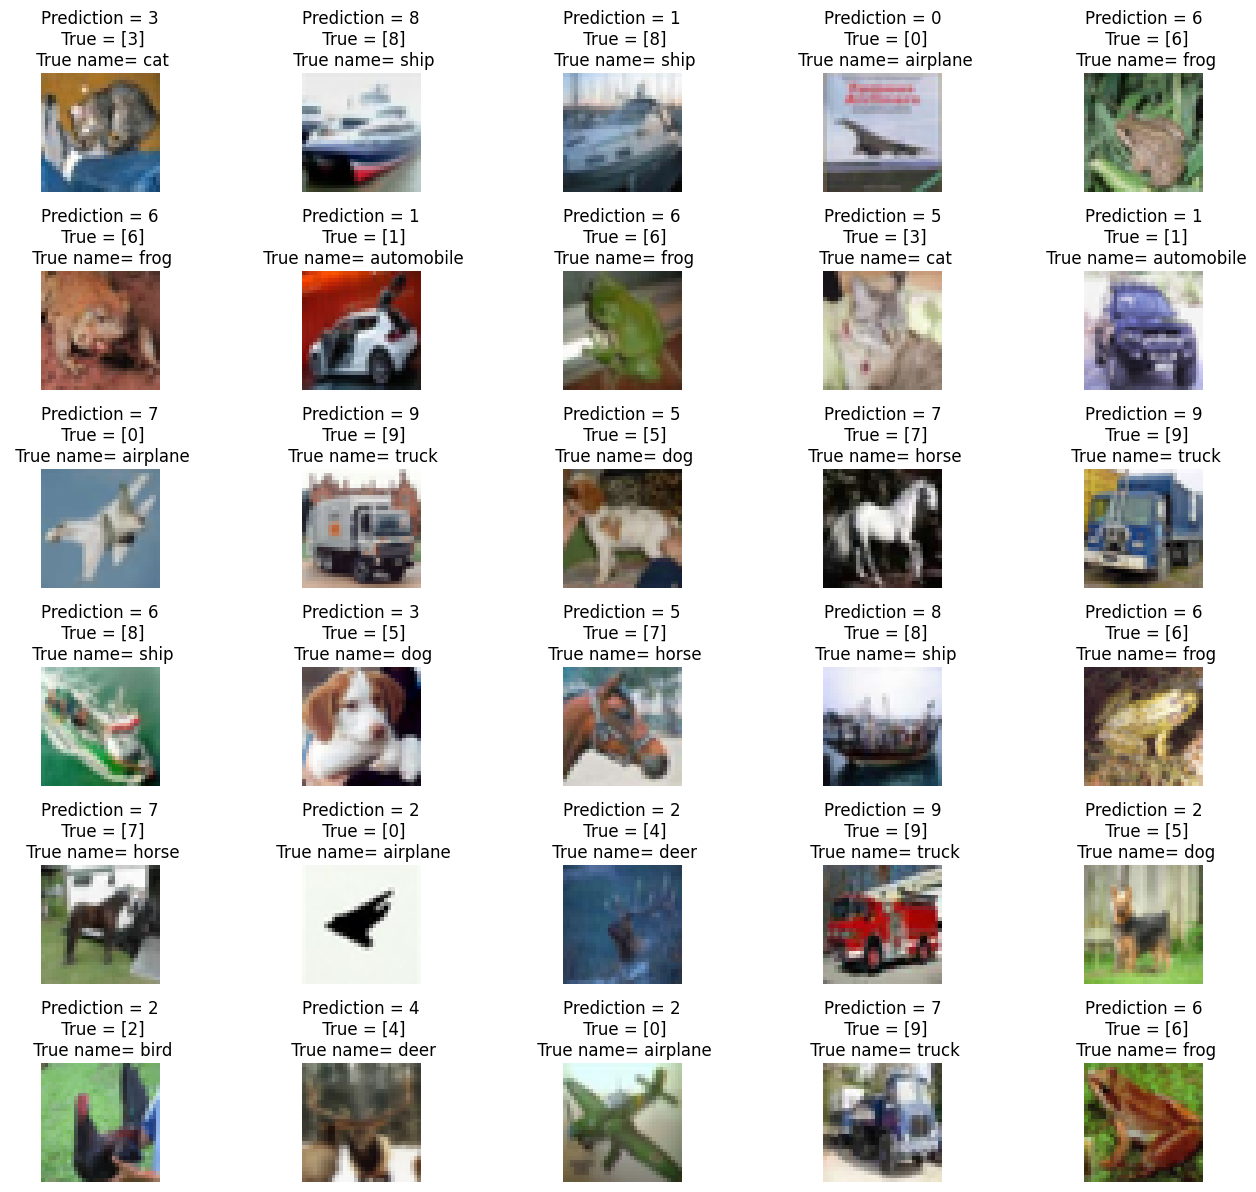

In [145]:
fig, axes = plt.subplots(6, 5, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, 30):
    axes[i].imshow(test_images[i])
    axes[i].set_title('Prediction = {}\n True = {}\n True name= {}'.format(y_pred[i], y_true[i], class_names[y_true[i][0]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2)

## Comentarios

Es importante recalcar los cambios que se realizaron dentro del código, se añadió una nueva capa convolucional con la función de tanh, además se añadió una capa de max pooling, posterior a esto se añadió una capa densa concectada completamente con 128 unidades y la función de activación softmax.





# Parte 3

Para mejorar la precisión se podrían aumentar los epochs porque , se podría cambiar las funciones de activación porque, se podrías utilizar métodos de optimización de hiperparámetros, o incluso añadir más capas. Al comparar los pasos 1 y 2, creo que la mejor solución es incrementar los epochs con el modelo inicial dado que añadiendole más capas la precisión se reduce.

In [158]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [159]:
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10))

In [160]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_10 (Flatten)        (None, 1024)            

In [161]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#vaidation split
history = model3.fit(train_images, train_labels, epochs=20, validation_data=(x_val, y_val))


Epoch 1/20
1563/1563 [==============================] - 85s 53ms/step - loss: 1.4933 - accuracy: 0.4561 - val_loss: 1.2098 - val_accuracy: 0.5686
Epoch 2/20
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1346 - accuracy: 0.5979 - val_loss: 0.9775 - val_accuracy: 0.6582
Epoch 3/20
1563/1563 [==============================] - 77s 50ms/step - loss: 0.9822 - accuracy: 0.6542 - val_loss: 0.8765 - val_accuracy: 0.6916
Epoch 4/20
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8833 - accuracy: 0.6907 - val_loss: 0.8284 - val_accuracy: 0.7075
Epoch 5/20
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8177 - accuracy: 0.7151 - val_loss: 0.7216 - val_accuracy: 0.7482
Epoch 6/20
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7550 - accuracy: 0.7358 - val_loss: 0.6771 - val_accuracy: 0.7663
Epoch 7/20
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7050 - accuracy: 0.7538 - val_loss: 0.6411 -

313/313 - 4s - loss: 1.1512 - accuracy: 0.6977 - 4s/epoch - 14ms/step


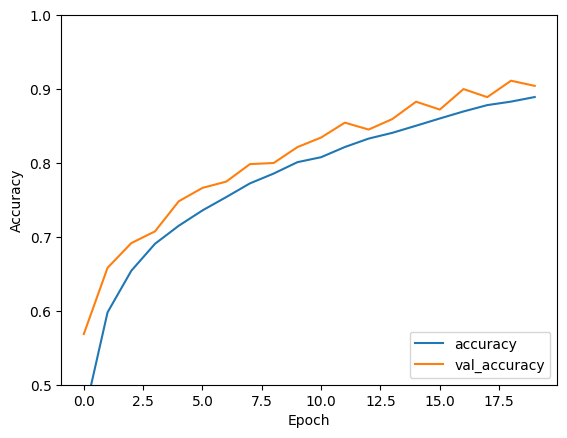

In [162]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

In [163]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [164]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

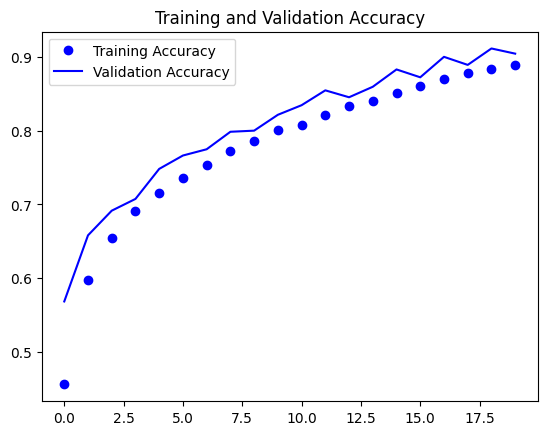

In [165]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

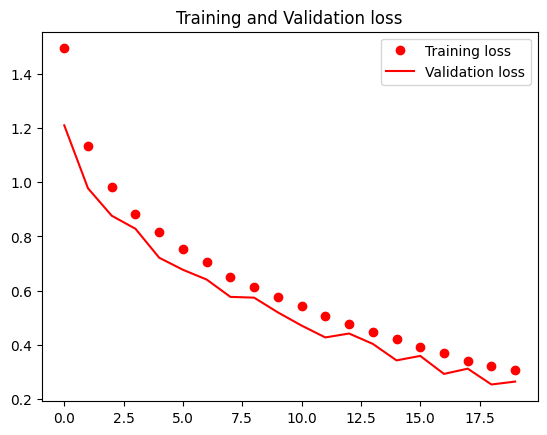

In [166]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [155]:
import numpy as np
y_pred_probs = model3.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 4s 13ms/step


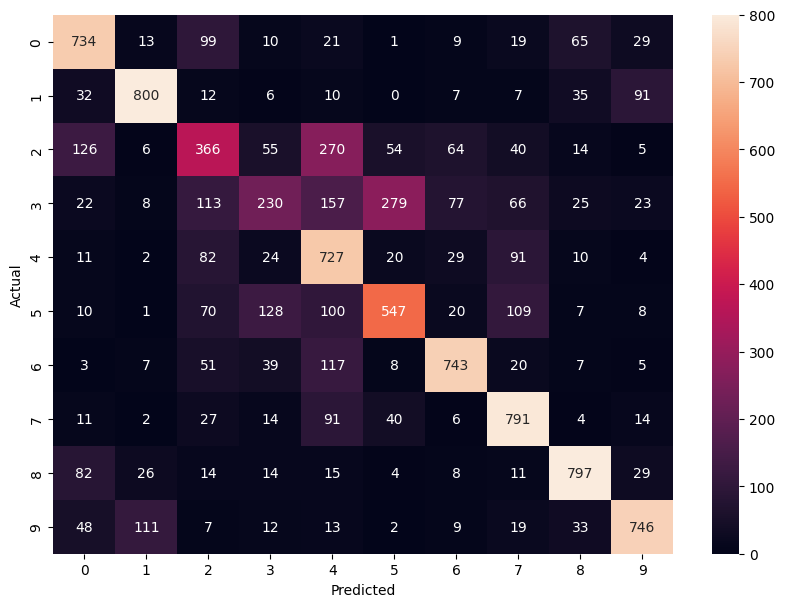

In [167]:
from sklearn.metrics import confusion_matrix
y_true = test_labels
cm = confusion_matrix(y_true, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

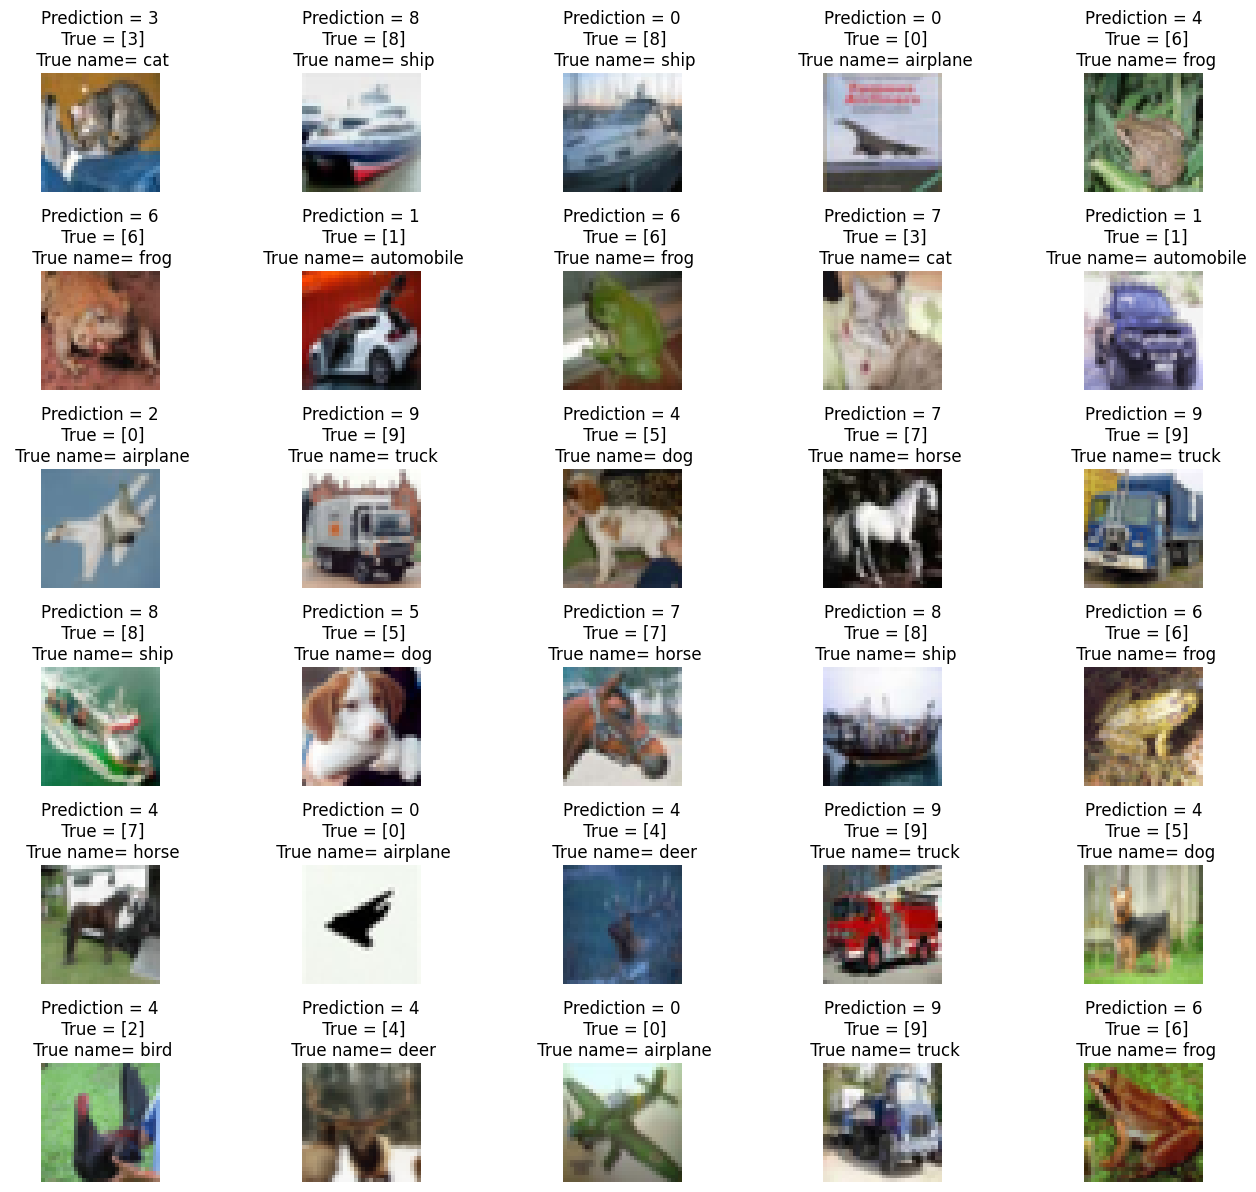

In [168]:
fig, axes = plt.subplots(6, 5, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, 30):
    axes[i].imshow(test_images[i])
    axes[i].set_title('Prediction = {}\n True = {}\n True name= {}'.format(y_pred[i], y_true[i], class_names[y_true[i][0]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2)

## Comentarios

La precisión del modelo 3, que es exactamente el mismo del modelo 1, sin embargo, en este modelo 3 solo se modificaron la cantidad de epochs, en este caso fueron 20 y la precisión obtenida fue de 0.8892, debido a este resultado se puede inferir que el modelo dos puede llegar a ser más preciso si se incrementan la cantidad de epochs pero requeriría alto poder computacional.




# Referencias

TensorFlow. (Sin fecha de publicación). Red neuronal convolucional (CNN). TensorFlow. https://www.tensorflow.org/tutorials/images/cnn?hl=es-419